##### Salary Estimation

In [34]:
import pandas as pd
import numpy as np

In [35]:
data = pd.read_csv('salary.csv')

In [36]:
data.shape
data.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K


##### map income colunm because it values not have numerical values

In [37]:
# income_set = set(data['income'])
data['income']=data['income'].map({'<=50K':0,'>50K':1}).astype(int)

In [40]:
x= data.iloc[:,:-1]
y = data.iloc[:,-1]
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
x_test.shape

(8141, 4)

In [49]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


##### Finding the  best k value

Text(0, 0.5, 'Mean error')

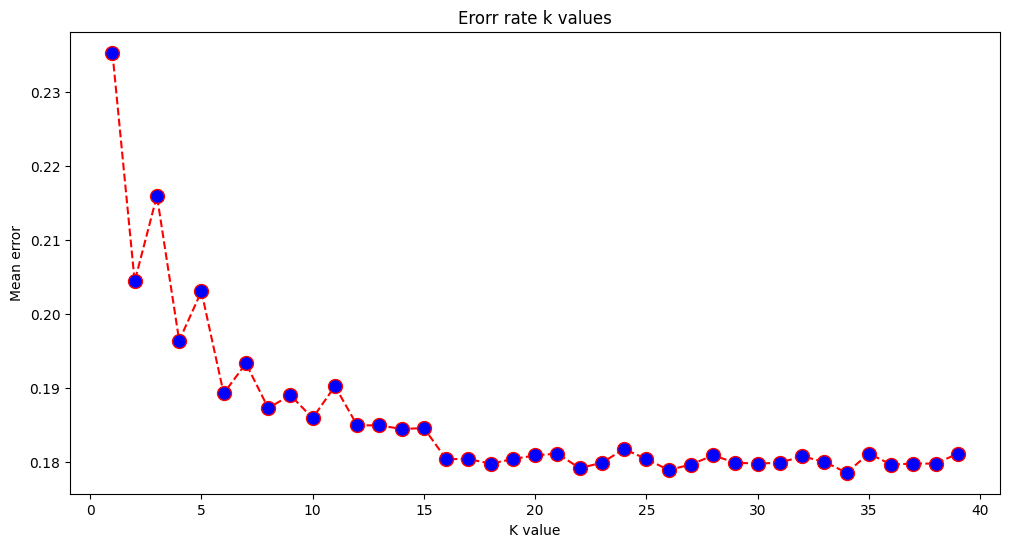

In [53]:

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
error=[]

for i in range(1,40):
    model =KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    pred_i = model.predict(x_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='red', linestyle ='dashed', marker ='o', markerfacecolor='blue', markersize=10)
plt.title('Erorr rate k values')
plt.xlabel('K value')
plt.ylabel('Mean error')


In [68]:
model =KNeighborsClassifier(n_neighbors=6, metric = 'minkowski',p=2)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [72]:
age= int(input("Enter Employee Age"))
edu= int(input("Enter Employee Education"))
cg= int(input("Enter Employee Capital Gain"))
wh= int(input("Enter Employee Hours per week"))
newEmp =[[age,edu,cg,wh]]
result = model.predict(sc.transform(newEmp))
if result==1:
    print('Employee salary Above 50K')
else:
    print('Employee salary less 50K')


Employee salary less 50K


In [69]:
import numpy as np

y_pred = model.predict(x_test)
# Convert y_test to a numpy array before reshaping
print(np.concatenate((y_pred.reshape(len(y_pred), 1), np.array(y_test).reshape(len(y_test), 1)), axis=1))


[[0 0]
 [0 0]
 [0 0]
 ...
 [0 1]
 [0 0]
 [0 0]]


In [70]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(cm)

print('Accuracy of the model :{0}%'. format(accuracy_score(y_test,y_pred)*100))


Confusion Matrix
[[5885  312]
 [1229  715]]
Accuracy of the model :81.0711214838472%
